In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LogNorm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import  RBF


import Bgolearn.BGOsampling as BGOS 

 Bgolearn : A Bayesian global optimization package 
 10 Jul 2022, version 1, Bin Cao, MGI, SHU, Shanghai, CHINA.


In [2]:
def True_function(X):
    X = np.array(X)
    Y = 0.013*X**4 - 0.25*X**3 + 1.61*X**2 - 4.1*X + 8
    return Y

In [3]:
def generate_function(data, obs):
    print('------------12 original data-----------')
    data = np.array(data)
    # for one feature dataset
    data_matrix = np.array(data[:,0]).reshape(-1, 1)

    Measured_response = np.zeros(len(data_matrix))
    for i in range(obs):
        Measured_response += np.array(data[:,i+1])
    # for one feature dataset
    Measured_response = Measured_response/obs
    
    Measured_std = []
    for j in range(len(data_matrix)):
        std = np.std(np.array(data[j,1:1+obs]))
        Measured_std.append(std)
    Measured_std = np.array(Measured_std)  
    print('evaluated mean of y :', Measured_response)
    print('evaluated std of y :', Measured_std)
    print('---------------------------------------\n')
    return data_matrix,Measured_response,Measured_std

## design virtual samples

In [4]:
virtual_samples = np.linspace(0,11,100)

## define a callable Kriging model and sampling function

In [5]:
def Sam_function(X,real_std,obs):
    print('--------------Draw samples-------------')
    print('real std of added datum:', real_std)
    X = np.array(X)
    Y = np.zeros(1)
    Y_list = []
    for i in range(obs):
        __sam = 0.013*X**4 - 0.25*X**3 + 1.61*X**2 - 4.1*X + 8 + np.random.normal(loc=0.0, scale=real_std, size=None)
        Y_list.append(__sam)
        Y += __sam
        print(i+1,'-th sampling, result = ', __sam)
    cal_std = np.std(np.array(Y_list))
    print('evaluated mean of added datum:', Y/obs)
    print('evaluated std of added datum:', cal_std)
    print('---------------------------------------\n')
    return Y/obs, np.array(cal_std), np.array(Y_list)


## instantiate Bgolearn

In [6]:
Bgolearn = BGOS.Bgolearn()
method_name = 'PoI'


------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

current optimal is : 4.4528822194
The next datum recomended by Probability of Improvement  : 
 x =  [8.66666667]
--------------Draw samples-------------
real std of added datum: 0.4
1 -th sampling, result =  4.174557921883907
2 -th sampling, result =  3.902674391643431
3 -th sampling, result =  3.8079570940780276
4 -th sampling, result =  3.2283304371601034
5 -th sampling, result =  4.0599461796531084
evaluated mean of added datum: [3.8346932]
evaluated std of added datum: 0.3284079767483712
---------------------------------------

1-th iteration 
 new added datum: [8.7, array([3.8347])]


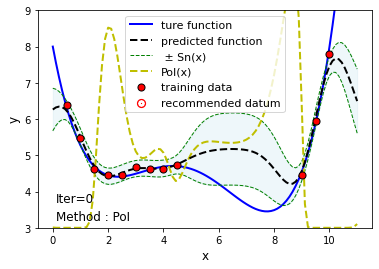

current optimal is : 3.8347
The next datum recomended by Probability of Improvement  : 
 x =  [8.44444444]
--------------Draw samples-------------
real std of added datum: 0.2
1 -th sampling, result =  3.918210313085737
2 -th sampling, result =  3.7343176952614336
3 -th sampling, result =  3.539380696274951
4 -th sampling, result =  3.7912559691924312
5 -th sampling, result =  3.8916998866243553
evaluated mean of added datum: [3.77497291]
evaluated std of added datum: 0.13532465879105776
---------------------------------------

2-th iteration 
 new added datum: [8.4, array([3.775])]


<Figure size 432x288 with 0 Axes>

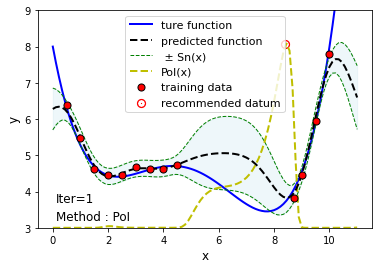

current optimal is : 3.775
The next datum recomended by Probability of Improvement  : 
 x =  [8.44444444]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  4.144068974151397
2 -th sampling, result =  3.2957470490423453
3 -th sampling, result =  4.0939514943324
4 -th sampling, result =  4.118289087632384
5 -th sampling, result =  3.4097474466342623
evaluated mean of added datum: [3.81236081]
evaluated std of added datum: 0.3773335471685708
---------------------------------------

3-th iteration 
 new added datum: [8.4, array([3.8124])]


<Figure size 432x288 with 0 Axes>

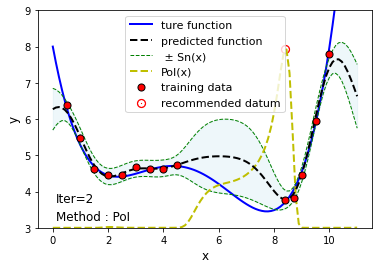

current optimal is : 3.775
The next datum recomended by Probability of Improvement  : 
 x =  [8.44444444]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.552161490463647
2 -th sampling, result =  3.928942682331886
3 -th sampling, result =  3.5855552149702725
4 -th sampling, result =  3.744979439507925
5 -th sampling, result =  3.621294214883462
evaluated mean of added datum: [3.68658661]
evaluated std of added datum: 0.13761303770947694
---------------------------------------

4-th iteration 
 new added datum: [8.4, array([3.6866])]


<Figure size 432x288 with 0 Axes>

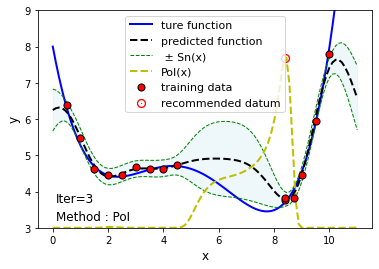

current optimal is : 3.6866
The next datum recomended by Probability of Improvement  : 
 x =  [8.33333333]
--------------Draw samples-------------
real std of added datum: 0.6
1 -th sampling, result =  3.22584754385825
2 -th sampling, result =  2.904685146525724
3 -th sampling, result =  3.2290473720879205
4 -th sampling, result =  3.426845379537641
5 -th sampling, result =  3.1280480581217494
evaluated mean of added datum: [3.1828947]
evaluated std of added datum: 0.16964413326308703
---------------------------------------

5-th iteration 
 new added datum: [8.3, array([3.1829])]


<Figure size 432x288 with 0 Axes>

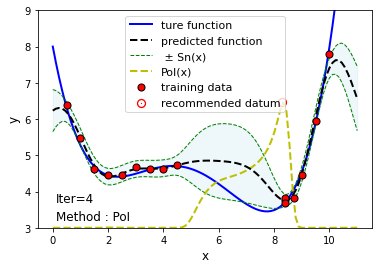

current optimal is : 3.1829
The next datum recomended by Probability of Improvement  : 
 x =  [7.66666667]
--------------Draw samples-------------
real std of added datum: 0.4
1 -th sampling, result =  4.194981578349968
2 -th sampling, result =  3.3102283575398572
3 -th sampling, result =  3.2299385865419246
4 -th sampling, result =  3.687280801296813
5 -th sampling, result =  3.7468891685491674
evaluated mean of added datum: [3.6338637]
evaluated std of added datum: 0.34594125189895913
---------------------------------------

6-th iteration 
 new added datum: [7.7, array([3.6339])]


<Figure size 432x288 with 0 Axes>

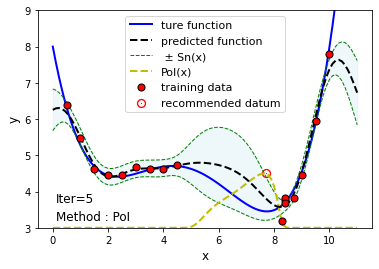

<Figure size 432x288 with 0 Axes>

In [10]:
obs = 5
guessed_noise_std = 0.3

data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
Y1=data.iloc[:,1:]

for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    
   
    class Kriging_model(object):
        def fit_pre(self,xtrain,ytrain,xtest):
            # instantiated model
            kernel = RBF() 
            mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = guessed_noise_std**2).fit(xtrain,ytrain)
            # defined the attribute's outputs
            mean,std = mdoel.predict(xtest,return_std=True)
            return mean,std  
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.PoI()*10 + 3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
    sam_std = round(random.uniform(0.1,0.7),1)
    datum_y, datum_std, Y_list = Sam_function(round(recommend,1),sam_std,obs)
    Measured_std = np.append(Measured_std,datum_std)
    data_matrix = np.append(data_matrix,np.round(recommend,1)).reshape(-1,1)
    Measured_response = np.append(Measured_response,np.round(datum_y,4))
    Y1 = np.append(Y1,Y_list)
 
    Measured_std1=(pd.DataFrame(Measured_std.reshape(len(Measured_std),1),columns=['Measured_std']))
    Measured_response1=(pd.DataFrame(Measured_response.reshape(len(Measured_std),1),columns=['Measured_response']))
    data_matrix1=(pd.DataFrame(data_matrix.reshape(len(data_matrix),1),columns=['x']))
    Y1=(pd.DataFrame(Y1.reshape(len(data_matrix),5)))
    data_iter=(np.hstack((data_matrix1,Measured_response1,Measured_std1,Y1)))
    
 
    
    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',([np.round(recommend,1),np.round(datum_y,4)]))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11)
    plt.savefig('{name}-sd_{sdlevel}-obs_{obstime}-{num}.png'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if 7.6 <= round(recommend,1) <= 7.8:
        break
    elif i>=10:
        print('Searching is defeated')
        break
data_iter=pd.DataFrame(data_iter.reshape(len(data_matrix),8),columns=['x','y_mean',"y_sd","y1","y2","y3","y4","y5"])
data_iter.to_csv('sd{:.2f}data.csv'.format(guessed_noise_std),float_format='%.4f') #保留两位小数


------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

current optimal is : 4.4528822194
The next datum recomended by Probability of Improvement  : 
 x =  [8.55555556]
--------------Draw samples-------------
real std of added datum: 0.2
1 -th sampling, result =  4.007605946108358
2 -th sampling, result =  3.827754007293844
3 -th sampling, result =  3.739125681558888
4 -th sampling, result =  4.131736702633579
5 -th sampling, result =  4.034894647668029
evaluated mean of added datum: [3.9482234]
evaluated std of added datum: 0.14349219813940836
---------------------------------------

1-th iteration 
 new added datum: [8.6, array([3.9482])]


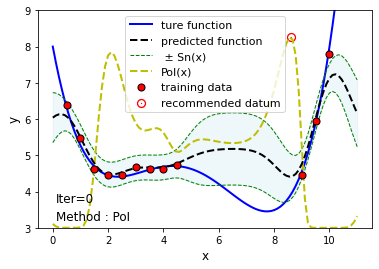

current optimal is : 3.9482
The next datum recomended by Probability of Improvement  : 
 x =  [8.44444444]
--------------Draw samples-------------
real std of added datum: 0.4
1 -th sampling, result =  3.3160983306269984
2 -th sampling, result =  3.890338515577808
3 -th sampling, result =  3.4230041563535103
4 -th sampling, result =  3.9833126410243045
5 -th sampling, result =  3.5601057205009683
evaluated mean of added datum: [3.63457187]
evaluated std of added datum: 0.2602952948189161
---------------------------------------

2-th iteration 
 new added datum: [8.4, array([3.6346])]


<Figure size 432x288 with 0 Axes>

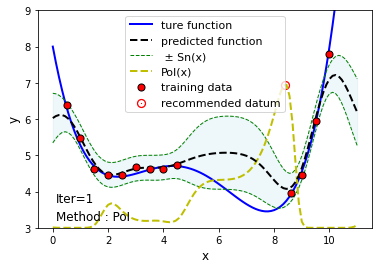

current optimal is : 3.6346
The next datum recomended by Probability of Improvement  : 
 x =  [8.22222222]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  3.9920255682275525
2 -th sampling, result =  3.691922379610431
3 -th sampling, result =  4.635979402285825
4 -th sampling, result =  4.294871132883915
5 -th sampling, result =  3.873173457928773
evaluated mean of added datum: [4.09759439]
evaluated std of added datum: 0.3331233542195893
---------------------------------------

3-th iteration 
 new added datum: [8.2, array([4.0976])]


<Figure size 432x288 with 0 Axes>

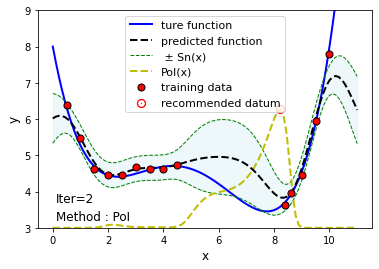

current optimal is : 3.6346
The next datum recomended by Probability of Improvement  : 
 x =  [8.22222222]
--------------Draw samples-------------
real std of added datum: 0.4
1 -th sampling, result =  3.5326016644905334
2 -th sampling, result =  3.67739814269271
3 -th sampling, result =  3.8274413925330846
4 -th sampling, result =  3.9633086604393344
5 -th sampling, result =  3.566842584502666
evaluated mean of added datum: [3.71351849]
evaluated std of added datum: 0.16181653528929563
---------------------------------------

4-th iteration 
 new added datum: [8.2, array([3.7135])]


<Figure size 432x288 with 0 Axes>

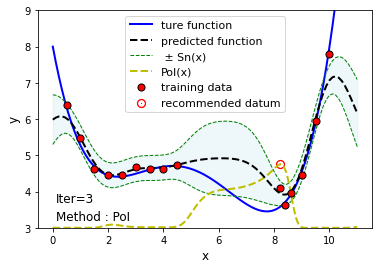

current optimal is : 3.6346
The next datum recomended by Probability of Improvement  : 
 x =  [8.22222222]
--------------Draw samples-------------
real std of added datum: 0.6
1 -th sampling, result =  3.8518598832979816
2 -th sampling, result =  3.2830726327006237
3 -th sampling, result =  4.870529145675436
4 -th sampling, result =  3.848470048497464
5 -th sampling, result =  4.387025686983485
evaluated mean of added datum: [4.04819148]
evaluated std of added datum: 0.5394236651776346
---------------------------------------

5-th iteration 
 new added datum: [8.2, array([4.0482])]


<Figure size 432x288 with 0 Axes>

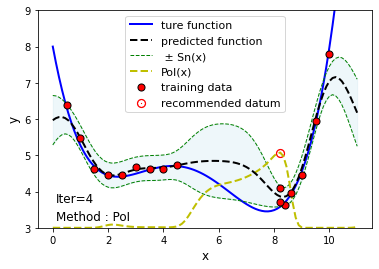

current optimal is : 3.6346
The next datum recomended by Probability of Improvement  : 
 x =  [7.66666667]
--------------Draw samples-------------
real std of added datum: 0.6
1 -th sampling, result =  3.802249571785641
2 -th sampling, result =  3.183048626696345
3 -th sampling, result =  2.6657166864010797
4 -th sampling, result =  1.9217814917350264
5 -th sampling, result =  2.789982375040685
evaluated mean of added datum: [2.87255575]
evaluated std of added datum: 0.6187582531825371
---------------------------------------

6-th iteration 
 new added datum: [7.7, array([2.8726])]


<Figure size 432x288 with 0 Axes>

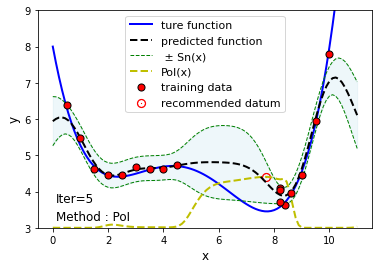

<Figure size 432x288 with 0 Axes>

In [12]:
obs = 5
guessed_noise_std = 0.5

data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
Y1=data.iloc[:,1:]

for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    
   
    class Kriging_model(object):
        def fit_pre(self,xtrain,ytrain,xtest):
            # instantiated model
            kernel = RBF() 
            mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = guessed_noise_std**2).fit(xtrain,ytrain)
            # defined the attribute's outputs
            mean,std = mdoel.predict(xtest,return_std=True)
            return mean,std  
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.PoI()*10 + 3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
    sam_std = round(random.uniform(0.1,0.7),1)
    datum_y, datum_std, Y_list = Sam_function(round(recommend,1),sam_std,obs)
    Measured_std = np.append(Measured_std,datum_std)
    data_matrix = np.append(data_matrix,np.round(recommend,1)).reshape(-1,1)
    Measured_response = np.append(Measured_response,np.round(datum_y,4))
    Y1 = np.append(Y1,Y_list)
 
    Measured_std1=(pd.DataFrame(Measured_std.reshape(len(Measured_std),1),columns=['Measured_std']))
    Measured_response1=(pd.DataFrame(Measured_response.reshape(len(Measured_std),1),columns=['Measured_response']))
    data_matrix1=(pd.DataFrame(data_matrix.reshape(len(data_matrix),1),columns=['x']))
    Y1=(pd.DataFrame(Y1.reshape(len(data_matrix),5)))
    data_iter=(np.hstack((data_matrix1,Measured_response1,Measured_std1,Y1)))
    
 
    
    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',([np.round(recommend,1),np.round(datum_y,4)]))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11)
    plt.savefig('{name}-sd_{sdlevel}-obs_{obstime}-{num}.png'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if 7.6 <= round(recommend,1) <= 7.8:
        break
    elif i>=10:
        print('Searching is defeated')
        break
data_iter=pd.DataFrame(data_iter.reshape(len(data_matrix),8),columns=['x','y_mean',"y_sd","y1","y2","y3","y4","y5"])
data_iter.to_csv('sd{:.2f}data.csv'.format(guessed_noise_std),float_format='%.4f') #保留两位小数


------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

current optimal is : 4.4528822194
The next datum recomended by Probability of Improvement  : 
 x =  [2.22222222]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.942219656342238
2 -th sampling, result =  4.468031460837102
3 -th sampling, result =  4.178022992504696
4 -th sampling, result =  4.0236339012019755
5 -th sampling, result =  4.302461035595518
evaluated mean of added datum: [4.18287381]
evaluated std of added datum: 0.18916198931797967
---------------------------------------

1-th iteration 
 new added datum: [2.2, array([4.1829])]


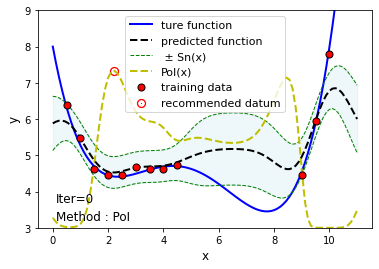

current optimal is : 4.1829
The next datum recomended by Probability of Improvement  : 
 x =  [8.33333333]
--------------Draw samples-------------
real std of added datum: 0.6
1 -th sampling, result =  2.3908268957971446
2 -th sampling, result =  2.8946250833211726
3 -th sampling, result =  1.8409865981300673
4 -th sampling, result =  3.1614937726696644
5 -th sampling, result =  3.284934852418055
evaluated mean of added datum: [2.71457344]
evaluated std of added datum: 0.5339352608628336
---------------------------------------

2-th iteration 
 new added datum: [8.3, array([2.7146])]


<Figure size 432x288 with 0 Axes>

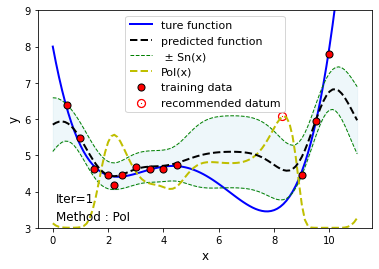

current optimal is : 2.7146
The next datum recomended by Probability of Improvement  : 
 x =  [8.]
--------------Draw samples-------------
real std of added datum: 0.4
1 -th sampling, result =  2.6565642715182274
2 -th sampling, result =  4.178306573029852
3 -th sampling, result =  3.8082990211806136
4 -th sampling, result =  3.568902506007744
5 -th sampling, result =  3.5129082171199624
evaluated mean of added datum: [3.54499612]
evaluated std of added datum: 0.5022594639998202
---------------------------------------

3-th iteration 
 new added datum: [8.0, array([3.545])]


<Figure size 432x288 with 0 Axes>

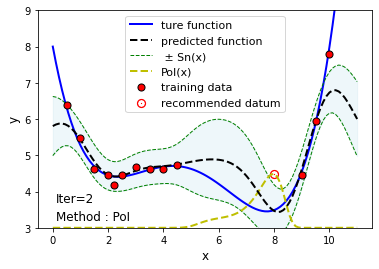

current optimal is : 2.7146
The next datum recomended by Probability of Improvement  : 
 x =  [7.77777778]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.419372053851459
2 -th sampling, result =  3.9041816036484085
3 -th sampling, result =  2.679447838932266
4 -th sampling, result =  2.568413481542353
5 -th sampling, result =  3.160826650185829
evaluated mean of added datum: [3.14644833]
evaluated std of added datum: 0.4901158136227002
---------------------------------------

4-th iteration 
 new added datum: [7.8, array([3.1464])]


<Figure size 432x288 with 0 Axes>

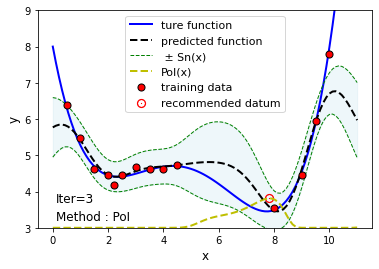

<Figure size 432x288 with 0 Axes>

In [11]:
obs = 5
guessed_noise_std = 0.7

data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
Y1=data.iloc[:,1:]

for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    
   
    class Kriging_model(object):
        def fit_pre(self,xtrain,ytrain,xtest):
            # instantiated model
            kernel = RBF() 
            mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = guessed_noise_std**2).fit(xtrain,ytrain)
            # defined the attribute's outputs
            mean,std = mdoel.predict(xtest,return_std=True)
            return mean,std  
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.PoI()*10 + 3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
    sam_std = round(random.uniform(0.1,0.7),1)
    datum_y, datum_std, Y_list = Sam_function(round(recommend,1),sam_std,obs)
    Measured_std = np.append(Measured_std,datum_std)
    data_matrix = np.append(data_matrix,np.round(recommend,1)).reshape(-1,1)
    Measured_response = np.append(Measured_response,np.round(datum_y,4))
    Y1 = np.append(Y1,Y_list)
 
    Measured_std1=(pd.DataFrame(Measured_std.reshape(len(Measured_std),1),columns=['Measured_std']))
    Measured_response1=(pd.DataFrame(Measured_response.reshape(len(Measured_std),1),columns=['Measured_response']))
    data_matrix1=(pd.DataFrame(data_matrix.reshape(len(data_matrix),1),columns=['x']))
    Y1=(pd.DataFrame(Y1.reshape(len(data_matrix),5)))
    data_iter=(np.hstack((data_matrix1,Measured_response1,Measured_std1,Y1)))
    
 
    
    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',([np.round(recommend,1),np.round(datum_y,4)]))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11)
    plt.savefig('{name}-sd_{sdlevel}-obs_{obstime}-{num}.png'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if 7.6 <= round(recommend,1) <= 7.8:
        break
    elif i>=10:
        print('Searching is defeated')
        break
data_iter=pd.DataFrame(data_iter.reshape(len(data_matrix),8),columns=['x','y_mean',"y_sd","y1","y2","y3","y4","y5"])
data_iter.to_csv('sd{:.2f}data.csv'.format(guessed_noise_std),float_format='%.4f') #保留两位小数
